# Notebook approche non supervisée

## Importation des packtages et des données

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
from PIL import Image

In [8]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [9]:
from wordcloud import WordCloud

In [10]:
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ouedr\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ouedr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ouedr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ouedr\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ouedr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ouedr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[n

True

In [11]:
df = pd.read_csv(r"C:\Users\ouedr\Desktop\Machine_Learning_Engineer\Projet_5_VF\my_data.csv")
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,minification failed returning unminified content,made first website using mvc work fine local m...,|asp.net|asp.net-mvc|bundling-and-minification|,24395412,40,49177,0.0,12
1,ajax request made flux app,creating react application flux architecture t...,|javascript|reactjs|reactjs-flux|,26632415,199,40698,0.0,6
2,gem install debugger error,running rail mac everything smoothly sudden ge...,|ruby-on-rails|ruby|rubygems|rvm|,24395453,25,28278,0.0,6
3,change body parser limit firebase,trying proxy file upload firebase cloud functi...,|node.js|express|firebase|google-cloud-functio...,45489810,7,946,NaN,1
4,io android material design hierarchical timing...,want animation introduced android material des...,|ios|uicollectionview|calayer|material-design|,26632893,11,895,0.0,3


## Features description et engineering

In [12]:
df.isnull().sum()

Title              24
Body                0
Tags                0
Id                  0
Score               0
ViewCount           0
FavoriteCount    7645
AnswerCount         0
dtype: int64

In [13]:
df= df.dropna(subset=['Title'])

In [14]:
X = df[['Title', 'Body']]
y = df['Tags']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Initialiser un CountVectorizer
vectorizer = CountVectorizer()
# X_train= X_train.dropna(subset=['Title'])
# X_test= X_test.dropna(subset=['Title'])
# Adapter (fit) du vectorizer sur les données d'entraînement
vectorizer = vectorizer.fit(X_train['Title'])

# Appliquer le (transformer) du vectorizer sur les données d'entraînement  de test
X_train_features = vectorizer.transform(X_train['Title'] + ' ' + X_train['Body'])
X_test_features = vectorizer.transform(X_test['Title'] + ' ' + X_test['Body'])

# Affichage des caractéristiques (features) générées
print("Nombre de features (termes) :", len(vectorizer.get_feature_names_out()))
print("Exemple de features :", vectorizer.get_feature_names_out()[:20])

Nombre de features (termes) : 16127
Exemple de features : ['aaa' 'aab' 'aac' 'aaf' 'aapt' 'aar' 'ab' 'abac' 'abandoned' 'abap'
 'abaqus' 'abbreviated' 'abbreviation' 'abc' 'abcd' 'abcde' 'abfss' 'abi'
 'abifilters' 'ability']


In [16]:
pd.DataFrame(X_train_features.toarray())

,0,1,2,3,4,5,6,7,8,9,...,16117,16118,16119,16120,16121,16122,16123,16124,16125,16126
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


## Modélisation avec LDA

### Mesure de la perplexité en fonction du nombrede topics

In [17]:
from sklearn.decomposition import LatentDirichletAllocation
from time import time

In [18]:
for i in range(4,31,2):
    n_topics = i

    print("Fitting LDA model with n_topics=%d" % (n_topics,))

    lda = LatentDirichletAllocation(n_components=n_topics,max_iter=5,
                                    learning_method='online',
                                    learning_offset=50.,
                                    random_state=0)
    t0 = time()
    lda.fit(X_train_features)

    train_gamma = lda.transform(X_train_features)
    train_perplexity = lda.perplexity(X_train_features)

    test_gamma = lda.transform(X_test_features)
    test_perplexity = lda.perplexity(X_test_features)

    print('sklearn preplexity: train=%.3f, test=%.3f' %
          (train_perplexity, test_perplexity))

    print("done in %0.3fs." % (time() - t0))

Fitting LDA model with n_topics=4
sklearn preplexity: train=1493.281, test=1665.184
done in 120.047s.
Fitting LDA model with n_topics=6
sklearn preplexity: train=1376.220, test=1569.739
done in 114.896s.
Fitting LDA model with n_topics=8
sklearn preplexity: train=1343.660, test=1550.599
done in 108.739s.
Fitting LDA model with n_topics=10
sklearn preplexity: train=1310.710, test=1530.567
done in 120.168s.
Fitting LDA model with n_topics=12
sklearn preplexity: train=1279.517, test=1511.117
done in 123.747s.
Fitting LDA model with n_topics=14
sklearn preplexity: train=1287.164, test=1532.057
done in 129.892s.
Fitting LDA model with n_topics=16
sklearn preplexity: train=1242.039, test=1478.932
done in 119.519s.
Fitting LDA model with n_topics=18
sklearn preplexity: train=1241.960, test=1492.172
done in 133.342s.
Fitting LDA model with n_topics=20
sklearn preplexity: train=1199.016, test=1444.739
done in 132.421s.
Fitting LDA model with n_topics=22
sklearn preplexity: train=1196.461, test=

### Evolution du score de cohérence en fonction du nombre de topics

In [1]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyldavis

ModuleNotFoundError: No module named 'pyldavis'

In [32]:
# Définition de la fonction compute_coherence_values
df['tokens'] = df['Title'].apply(preprocess_text) + df['Body'].apply(preprocess_text)
dictionary = Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]
id2word = Dictionary(df['tokens'])
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    """
    Calculer la cohérence c_v pour différents nombres de sujets

    Paramètres:
    ----------
    dictionnaire : Dictionnaire Gensim
    Corpus : Corpus Gensim
    textes : Liste des textes saisis
    limite : Nombre maximum de sujets

    Retour:
    -------
    model_list : Liste des modèles de sujets LDA
    coherence_values ​​: Valeurs de cohérence correspondant au modèle LDA avec nombre respectif de sujets
    """
    coherence_values = []
    model_list = []
    for num_topics in range(4, 31, 2):
        model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherence_model = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# # Appel de la fonction compute_coherence_values avec les bonnes données
# df['tokens'] = df['Title'].apply(preprocess_text) + df['Body'].apply(preprocess_text)

# # Création du dictionnaire (id2word) et du corpus de documents

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df['Title'].apply(preprocess_text) + df['Body'].apply(preprocess_text), start=2, limit=40, step=4)

# Affichage du graphique
import matplotlib.pyplot as plt
plt.plot(range(4, 31, 2), coherence_values)
plt.xlabel("Numéro de topics")
plt.ylabel("Score de cohérence C_v")
plt.title("Évolution du score de cohérence en fonction du nombre de topics")
plt.show()

NameError: name 'processed_text' is not defined

In [ ]:
# Définir la plage de valeurs de nombre de topics que vous souhaitez tester
topics_range = range(4, 31, 2)

# Ensuite, vous pouvez utiliser votre code existant avec cette variable
best_result_index = coherence_values.index(max(coherence_values))
num_topics = topics_range[best_result_index]  # Nombre de topics correspondant au meilleur résultat
optimal_model = model_list[best_result_index]

# Sélectionnez le modèle et imprimez les topics
model_topics = optimal_model.show_topics(formatted=False)
print(f"Le modèle avec {num_topics} topics donne le score de cohérence le plus élevé de {coherence_values[best_result_index]}")

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
# Créez et entraînez votre modèle LDA
lda = LatentDirichletAllocation(learning_method='online', learning_offset=50.0, max_iter=5, n_components=24, random_state=42)
lda.fit(X_train_features)

### Visualisation des topics

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 20
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

Gestion de bases de données et requêtes (Database Management)

Développement d'applications avec React (React Application Development)

Manipulation de données JSON (JSON Data Manipulation)

Développement Java avec Spring Framework (Java Development with Spring Framework)

Gestion des dates et des horaires (Date and Time Handling)

Utilisation de code et résolution de problèmes (Code Usage and Troubleshooting)

Interaction utilisateur et modèles (User Interaction and Models)

Programmation orientée objet en général (Object-Oriented Programming)

Manipulation d'images et de graphiques (Image and Graph Manipulation)

Gestion de versions et de build de projets (Project Versioning and Building)

Développement web avec ASP.NET et Visual Studio (Web Development with ASP.NET and Visual Studio)

Gestion de fichiers et de répertoires (File and Directory Management)

Manipulation des éléments HTML et CSS (HTML and CSS Element Manipulation)

Développement JavaScript et manipulation du DOM (JavaScript Development and DOM Manipulation)

Manipulation de données tabulaires (Tabular Data Manipulation)

Programmation Swift et iOS (Swift Programming and iOS)

Gestion de l'état et des événements avec Vue.js (State and Event Management with Vue.js)

Gestion d'événements et d'interactions utilisateur (Event and User Interaction Management)

Programmation C++ et gestion des erreurs (C++ Programming and Error Handling)

Utilisation de bibliothèques et modules Python (Python Libraries and Modules Usage)

Gestion de tests et de dépôts avec Git (Testing and Repository Management with Git)

Gestion des erreurs et des connexions serveur (Server Error and Connection Handling)

Développement Android avec Firebase (Android Development with Firebase)

Développement et utilisation de services web (Web Service Development and Usage)

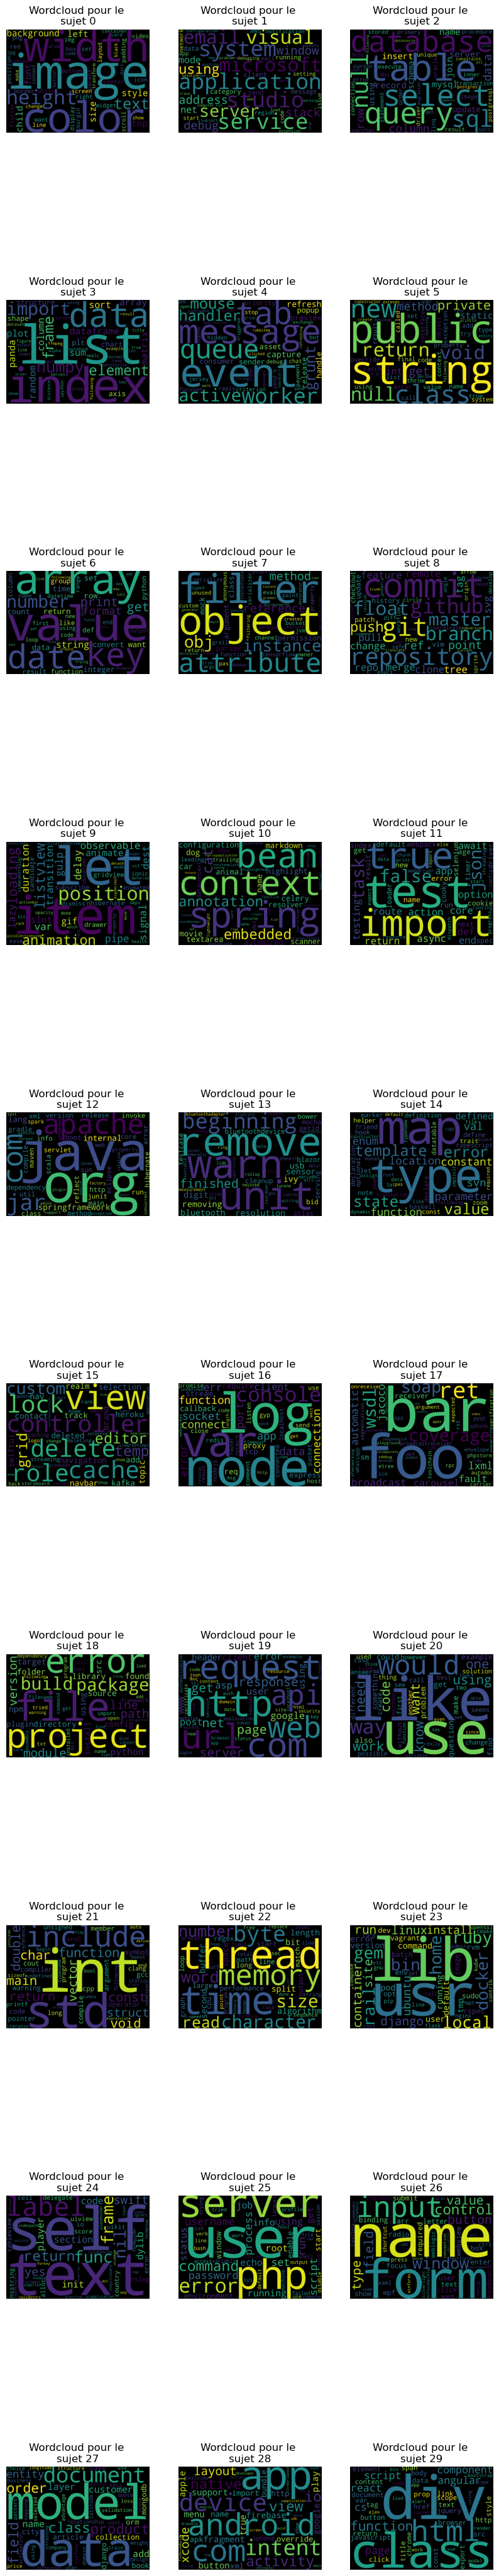

In [ ]:
stop_words = set(stopwords.words("english"))
num_rows = len(lda.components_) // 3 + 1
tf_feature_names =vectorizer.get_feature_names_out()
def wordcloud_lda(lda, tf_feature_names):

    fig, axs = plt.subplots(len(lda.components_) // 3, 3, figsize=(10, 5*num_rows))

    for i in range(len(lda.components_)):
        corpus_lda = lda.components_[i]
        first_topic_words = [
            tf_feature_names[l] for l in corpus_lda.argsort()[: -50 - 1 : -1]
        ]
        k = i // 3
        j = i - k * 3
        wordcloud = WordCloud(
            stopwords=stop_words, background_color="black", width=2500, height=1800
        )
        wordcloud = wordcloud.generate(" ".join(first_topic_words))
        axs[k][j].set_title("Wordcloud pour le \nsujet {}".format(i))
        axs[k][j].axis("off")
        axs[k][j].imshow(wordcloud)

    r = len(lda.components_) % 3
    [
        fig.delaxes(axs[len(lda.components_) // 3, k - 1])
        for k in range(r + 1, 3 + 1)
        if r != 0
    ]


wc = wordcloud_lda(lda, tf_feature_names)
wc

In [ ]:
# Appliquer le prétraitement au DataFrame
df['tokens'] = df['Title'].apply(preprocess_text) + df['Body'].apply(preprocess_text)

# Création du dictionnaire (id2word) et du corpus de documents
dictionary = Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

# Entraînement d'un modèle LDA
lda_model = LdaModel(corpus, num_topics=24, id2word=dictionary, passes=20)

# Visualisation des topics avec pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_visualization.html')  # Sauvegarder la visualisation au format HTML
pyLDAvis.display(vis)  # Afficher la visualisation dans le notebook

NameError: name 'preprocess_text' is not defined

## Evaluation metier du best_model

### Taux de couverture des tags réels

In [ ]:
# Convertir les tags en une liste de listes
y_true = y_test.str.split().tolist()

In [ ]:
# Utilisez le modèle pour prédire les mots-clés pour les questions de test
y_pred = lda.transform(X_test_features)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Convertir les prédictions en un format approprié
y_pred_labels = [max(enumerate(pred), key=lambda x: x[1])[0] for pred in y_pred]

# Convertir les étiquettes réelles en un format approprié
y_true_labels = [max(enumerate(true), key=lambda x: x[1])[0] for true in y_true]

# Évaluez la précision, le rappel et la F-mesure des tags prédits par rapport aux tags réels
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

### Taux de couverture des mots des questions

In [ ]:
# Utilisez le modèle pour prédire les mots-clés pour les questions de test
y_pred = lda.transform(X_test_features)

# Calculer la diversité des mots-clés proposés
average_word_coverage = np.mean(np.sum(y_pred > 0, axis=1))

print("Average word coverage:", average_word_coverage)

### Test de visu sur quelques questions

In [ ]:
# Exemple d'évaluation visuelle sur les 10 premières questions
for i in range(5):
    print("Question:", i)
    print("Tags réels:", y_true[i])
    print("Mots-clés prédits:", y_pred[i])
    print("\n")